# Segmenting and Clustering Neighborhoods in Toronto - Part-3

#### Importing Libraries

In [1]:
import numpy as np 
import pandas as pd

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests

import matplotlib.cm as cm
import matplotlib.colors as colors

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

from sklearn.cluster import KMeans # import k-means from clustering stage

import folium # map rendering library

print('Libraries imported.')

Libraries imported.


#### Importing the dataset saved from part 2 of the assignment

In [2]:
df = pd.read_csv('Toronto_1.csv')

In [3]:
df.head()

,Postalcode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.81139,-79.19662
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.78574,-79.15875
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.76575,-79.17470
3,M1G,Scarborough,Woburn,43.76812,-79.21761
4,M1H,Scarborough,Cedarbrae,43.76944,-79.23892


#### How many unique Boroughs in the city of Torornto?

The dataframe has 10 boroughs and 103 neighborhoods.

#### Use geopy library to get the latitude and longitude values of Toronto City

In [7]:
address = 'Toronto'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


#### Map to visualize the Toronto neighborhoods

In [9]:
# create map of Toronto using latitude and longitude values
map_TO = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df['Latitude'], df['Longitude'], df['Borough'], df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_TO)  
    
map_TO


#### Boroughs that contain the word Toronto and explore the dataframe

In [10]:
toronto_city = df[df['Borough'].str.contains("Toronto")].reset_index(drop=True)
toronto_city.drop([22], inplace=True)
toronto_city1 = toronto_city.reset_index(drop=True)
toronto_city1

,Postalcode,Borough,Neighborhood,Latitude,Longitude
0,M4E,East Toronto,The Beaches,43.67709,-79.29547
1,M4K,East Toronto,"The Danforth West, Riverdale",43.68375,-79.35512
2,M4L,East Toronto,"India Bazaar, The Beaches West",43.66797,-79.31467
3,M4M,East Toronto,Studio District,43.66213,-79.33497
4,M4N,Central Toronto,Lawrence Park,43.72843,-79.38713
5,M4P,Central Toronto,Davisville North,43.71276,-79.38851
6,M4R,Central Toronto,"North Toronto West, Lawrence Park",43.71458,-79.40668
7,M4S,Central Toronto,Davisville,43.70340,-79.38659
8,M4T,Central Toronto,"Moore Park, Summerhill East",43.69048,-79.38318
9,M4V,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",43.68568,-79.40237


In [11]:
toronto_city1.shape

(38, 5)

In [12]:
# create map of Toronto using latitude and longitude values
map_torontocity = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(toronto_city1['Latitude'], toronto_city1['Longitude'], toronto_city1['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_torontocity)  
    
map_torontocity

#### Define Foursquare Credentials and Version

In [13]:
CLIENT_ID = '1W5TLVXZFWOJO3ZYPQQLHYAH3EOPKOSKJJEUDXQCZKZDUVW1' # your Foursquare ID
CLIENT_SECRET = 'ZIGTLKPAKXIKDRXF3BPTCMJ24QI01I502FBMBUGCYSCTTNFF' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 1W5TLVXZFWOJO3ZYPQQLHYAH3EOPKOSKJJEUDXQCZKZDUVW1
CLIENT_SECRET:ZIGTLKPAKXIKDRXF3BPTCMJ24QI01I502FBMBUGCYSCTTNFF


# Explore Each Neighborhood

#### Function for getting the venue details for all of the neighborhood

In [14]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    return(nearby_venues)

#### Now write the code to run the above function on each neighborhood and create a new dataframe called toronto_venues.

In [16]:
toronto_venues = getNearbyVenues(names=toronto_city1['Neighborhood'],
                                   latitudes=toronto_city1['Latitude'],
                                   longitudes=toronto_city1['Longitude'])

The Beaches
The Danforth West, Riverdale
India Bazaar, The Beaches West
Studio District
Lawrence Park
Davisville North
North Toronto West,  Lawrence Park
Davisville
Moore Park, Summerhill East
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
Rosedale
St. James Town, Cabbagetown
Church and Wellesley
Regent Park, Harbourfront
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Richmond, Adelaide, King
Harbourfront East, Union Station, Toronto Islands
Toronto Dominion Centre, Design Exchange
Commerce Court, Victoria Hotel
Forest Hill North & West, Forest Hill Road Park
The Annex, North Midtown, Yorkville
University of Toronto, Harbord
Kensington Market, Chinatown, Grange Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Stn A PO Boxes
First Canadian Place, Underground city
Christie
Dufferin, Dovercourt Village
Little Portugal, Trinity
Brockton, Parkdale Village, Exhibition Place
High Park, Th

In [17]:
print(toronto_venues.shape)

(1716, 7)


In [18]:
toronto_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.67709,-79.29547,Glen Manor Ravine,43.676821,-79.293942,Trail
1,The Beaches,43.67709,-79.29547,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
2,The Beaches,43.67709,-79.29547,Grover Pub and Grub,43.679181,-79.297215,Pub
3,The Beaches,43.67709,-79.29547,Upper Beaches,43.680563,-79.292869,Neighborhood
4,"The Danforth West, Riverdale",43.68375,-79.35512,Dairy Queen,43.684223,-79.357062,Ice Cream Shop
...,...,...,...,...,...,...,...
1711,"Business reply mail Processing Centre, South C...",43.64869,-79.38544,Red Eye Espresso,43.651150,-79.390146,Café
1712,"Business reply mail Processing Centre, South C...",43.64869,-79.38544,Kanga,43.649955,-79.389352,Pie Shop
1713,"Business reply mail Processing Centre, South C...",43.64869,-79.38544,Condom Shack,43.650542,-79.388138,Hobby Shop
1714,"Business reply mail Processing Centre, South C...",43.64869,-79.38544,Mi Taco Taqueria,43.650380,-79.388666,Taco Place


#### Check how many venues were returned for each neighborhood

In [19]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,64,64,64,64,64,64
"Brockton, Parkdale Village, Exhibition Place",85,85,85,85,85,85
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",100,100,100,100,100,100
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",74,74,74,74,74,74
Central Bay Street,63,63,63,63,63,63
Christie,11,11,11,11,11,11
Church and Wellesley,86,86,86,86,86,86
"Commerce Court, Victoria Hotel",100,100,100,100,100,100
Davisville,29,29,29,29,29,29


In [20]:
# Unique categories from the returned venues
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 228 uniques categories.


## Analyse Each Neighborhood

In [21]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Yoga Studio,Accessories Store,Adult Boutique,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Veterinarian,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# Check for the new dataframe size
toronto_onehot.shape

(1716, 228)

In [23]:
# Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Accessories Store,Adult Boutique,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Veterinarian,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint
0,Berczy Park,0.015625,0.000000,0.000000,0.000000,0.015625,0.00,0.015625,0.000000,0.000000,...,0.000000,0.00,0.00,0.015625,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,"Brockton, Parkdale Village, Exhibition Place",0.011765,0.011765,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.023529,...,0.000000,0.00,0.00,0.011765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,"Business reply mail Processing Centre, South C...",0.000000,0.000000,0.000000,0.020000,0.000000,0.00,0.010000,0.000000,0.000000,...,0.000000,0.00,0.00,0.020000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000
3,"CN Tower, King and Spadina, Railway Lands, Har...",0.013514,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.000000,0.00,0.00,0.000000,0.013514,0.000000,0.000000,0.000000,0.000000,0.000000
4,Central Bay Street,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.015873,0.015873,0.000000,...,0.000000,0.00,0.00,0.000000,0.000000,0.015873,0.015873,0.015873,0.000000,0.000000
5,Christie,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Church and Wellesley,0.011628,0.000000,0.011628,0.011628,0.000000,0.00,0.000000,0.000000,0.000000,...,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.011628,0.000000,0.000000,0.000000
7,"Commerce Court, Victoria Hotel",0.000000,0.000000,0.000000,0.040000,0.000000,0.00,0.010000,0.000000,0.000000,...,0.000000,0.00,0.00,0.010000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000
8,Davisville,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.034483,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Davisville North,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [24]:
# Confirm the new size
toronto_grouped.shape

(38, 228)

In [25]:
# Print each neighborhood along with the top 5 most common venues
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
                venue  freq
0         Coffee Shop  0.09
1  Seafood Restaurant  0.05
2        Cocktail Bar  0.05
3         Cheese Shop  0.03
4            Beer Bar  0.03


----Brockton, Parkdale Village, Exhibition Place----
         venue  freq
0          Bar  0.07
1         Café  0.06
2  Coffee Shop  0.06
3   Restaurant  0.05
4    Gift Shop  0.04


----Business reply mail Processing Centre, South Central Letter Processing Plant Toronto----
              venue  freq
0       Coffee Shop  0.07
1             Hotel  0.05
2              Café  0.03
3  Asian Restaurant  0.03
4        Restaurant  0.03


----CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport----
                venue  freq
0  Italian Restaurant  0.08
1         Coffee Shop  0.07
2                Café  0.05
3                 Bar  0.04
4                Park  0.04


----Central Bay Street----
                       venue  freq
0                Coffee Shop  0

### Put that top 5 values in a dataframe

#### Write a fuction to sort venues in descending order

In [26]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [27]:
# Create the new dataframe and display the top 10 venues for each neighborhood
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Seafood Restaurant,Cocktail Bar,Cheese Shop,Restaurant,Bakery,Beer Bar,Farmers Market,Optical Shop,Movie Theater
1,"Brockton, Parkdale Village, Exhibition Place",Bar,Café,Coffee Shop,Restaurant,Gift Shop,Sandwich Place,Lounge,Japanese Restaurant,Breakfast Spot,Nightclub
2,"Business reply mail Processing Centre, South C...",Coffee Shop,Hotel,Asian Restaurant,Restaurant,Café,Burrito Place,Fast Food Restaurant,Concert Hall,Bar,Steakhouse
3,"CN Tower, King and Spadina, Railway Lands, Har...",Italian Restaurant,Coffee Shop,Café,French Restaurant,Park,Bar,Lounge,Restaurant,Grocery Store,Sandwich Place
4,Central Bay Street,Coffee Shop,Clothing Store,Hotel,Plaza,Middle Eastern Restaurant,Sandwich Place,Café,Bubble Tea Shop,Cosmetics Shop,Seafood Restaurant
5,Christie,Café,Grocery Store,Playground,Athletics & Sports,Candy Store,Italian Restaurant,Baby Store,Coffee Shop,Dessert Shop,Elementary School
6,Church and Wellesley,Coffee Shop,Japanese Restaurant,Restaurant,Sushi Restaurant,Gay Bar,Fast Food Restaurant,Café,Mediterranean Restaurant,Pizza Place,Pub
7,"Commerce Court, Victoria Hotel",Coffee Shop,Restaurant,Hotel,Café,Italian Restaurant,Gym,American Restaurant,Japanese Restaurant,Beer Bar,Seafood Restaurant
8,Davisville,Dessert Shop,Park,Café,Pizza Place,Sandwich Place,Coffee Shop,Italian Restaurant,Thai Restaurant,Gym,Indoor Play Area
9,Davisville North,Breakfast Spot,Gym / Fitness Center,Hotel,Bus Line,Food & Drink Shop,Park,Department Store,Event Space,Elementary School,Escape Room


## Clustering of Neighborhoods

#### In order to identify the optimal number of clusters, we need to use the Elbow Method! When the slope of the tangent line starts to be almost horizontal, that is the optimal number of cluster!

In [29]:
toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

distortions = []

K = range(1,20)
for k in K:
    kmean = KMeans(n_clusters=k, random_state=0, n_init = 50, max_iter = 500)
    kmean.fit(toronto_grouped_clustering)
    distortions.append(kmean.inertia_)

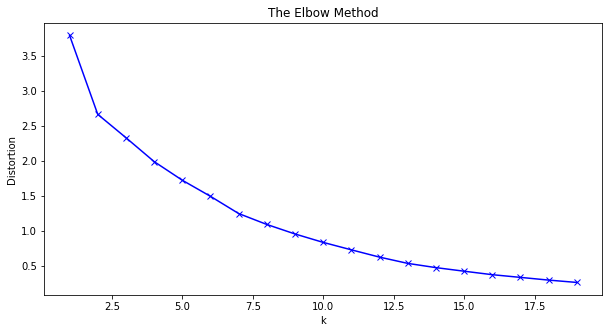

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method')
plt.show()

#### The elbow method seems to suggest 7 or 8 clusters

In [31]:
kclusters = 7

#run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [32]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = toronto_city1

# merge toronto_grouped with toronto_city1 to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged

,Postalcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M4E,East Toronto,The Beaches,43.67709,-79.29547,0,Health Food Store,Pub,Trail,Dog Run,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Event Space,Ethiopian Restaurant
1,M4K,East Toronto,"The Danforth West, Riverdale",43.68375,-79.35512,0,Bus Line,Business Service,Grocery Store,Park,Ice Cream Shop,Coffee Shop,Discount Store,Intersection,Wings Joint,Event Space
2,M4L,East Toronto,"India Bazaar, The Beaches West",43.66797,-79.31467,0,Pizza Place,Park,Fast Food Restaurant,Gym,Burrito Place,Steakhouse,Food & Drink Shop,Board Shop,Liquor Store,Sandwich Place
3,M4M,East Toronto,Studio District,43.66213,-79.33497,0,Pizza Place,Diner,Italian Restaurant,Brewery,Bakery,Gastropub,Arts & Crafts Store,Coffee Shop,Sushi Restaurant,Bar
4,M4N,Central Toronto,Lawrence Park,43.72843,-79.38713,5,Bus Line,Business Service,Swim School,Wings Joint,Electronics Store,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant
5,M4P,Central Toronto,Davisville North,43.71276,-79.38851,0,Breakfast Spot,Gym / Fitness Center,Hotel,Bus Line,Food & Drink Shop,Park,Department Store,Event Space,Elementary School,Escape Room
6,M4R,Central Toronto,"North Toronto West, Lawrence Park",43.71458,-79.40668,4,Playground,Gym Pool,Park,Dog Run,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Event Space,Ethiopian Restaurant
7,M4S,Central Toronto,Davisville,43.70340,-79.38659,0,Dessert Shop,Park,Café,Pizza Place,Sandwich Place,Coffee Shop,Italian Restaurant,Thai Restaurant,Gym,Indoor Play Area
8,M4T,Central Toronto,"Moore Park, Summerhill East",43.69048,-79.38318,6,Trail,Tennis Court,Gym,Park,Ethiopian Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,Escape Room,Wings Joint
9,M4V,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",43.68568,-79.40237,3,Coffee Shop,Light Rail Station,Liquor Store,Supermarket,Wings Joint,Electronics Store,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm


In [33]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Examine Clusters

In [34]:
# Cluster 1
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,East Toronto,0,Health Food Store,Pub,Trail,Dog Run,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Event Space,Ethiopian Restaurant
1,East Toronto,0,Bus Line,Business Service,Grocery Store,Park,Ice Cream Shop,Coffee Shop,Discount Store,Intersection,Wings Joint,Event Space
2,East Toronto,0,Pizza Place,Park,Fast Food Restaurant,Gym,Burrito Place,Steakhouse,Food & Drink Shop,Board Shop,Liquor Store,Sandwich Place
3,East Toronto,0,Pizza Place,Diner,Italian Restaurant,Brewery,Bakery,Gastropub,Arts & Crafts Store,Coffee Shop,Sushi Restaurant,Bar
5,Central Toronto,0,Breakfast Spot,Gym / Fitness Center,Hotel,Bus Line,Food & Drink Shop,Park,Department Store,Event Space,Elementary School,Escape Room
7,Central Toronto,0,Dessert Shop,Park,Café,Pizza Place,Sandwich Place,Coffee Shop,Italian Restaurant,Thai Restaurant,Gym,Indoor Play Area
11,Downtown Toronto,0,Coffee Shop,Park,Pizza Place,Café,Restaurant,Italian Restaurant,Pub,Bakery,Yoga Studio,Butcher
12,Downtown Toronto,0,Coffee Shop,Japanese Restaurant,Restaurant,Sushi Restaurant,Gay Bar,Fast Food Restaurant,Café,Mediterranean Restaurant,Pizza Place,Pub
13,Downtown Toronto,0,Coffee Shop,Breakfast Spot,Yoga Studio,Thai Restaurant,Event Space,Spa,Food Truck,Electronics Store,Restaurant,Distribution Center
14,Downtown Toronto,0,Coffee Shop,Clothing Store,Café,Japanese Restaurant,Hotel,Cosmetics Shop,Middle Eastern Restaurant,Bookstore,Diner,Movie Theater


In [35]:
# Cluster 2
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,Central Toronto,1,Park,Wings Joint,Donut Shop,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Event Space,Ethiopian Restaurant


In [36]:

# Cluster 3
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
33,West Toronto,2,Convenience Store,Park,Sandwich Place,Cuban Restaurant,Donut Shop,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Event Space


In [37]:

# Cluster 4
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,Central Toronto,3,Coffee Shop,Light Rail Station,Liquor Store,Supermarket,Wings Joint,Electronics Store,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm


In [38]:
# Cluster 5
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Central Toronto,4,Playground,Gym Pool,Park,Dog Run,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Event Space,Ethiopian Restaurant
10,Downtown Toronto,4,Park,Playground,Bike Trail,Donut Shop,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Event Space


In [39]:
# Cluster 6
toronto_merged.loc[toronto_merged['Cluster Labels'] == 5, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Central Toronto,5,Bus Line,Business Service,Swim School,Wings Joint,Electronics Store,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant


In [40]:
# Cluster 7
toronto_merged.loc[toronto_merged['Cluster Labels'] == 6, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Central Toronto,6,Trail,Tennis Court,Gym,Park,Ethiopian Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,Escape Room,Wings Joint
